In [1]:
import tensorflow as tf
import pathlib
import cv2
import imutils
import numpy as np
import pickle
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

In [2]:
model_dirpathname = '../Models/Model_1' #uncomment to use model 1
#model_dirpathname = '../Models/Model_2' #uncomment to use model 2
#model_dirpathname = '../Models/Model_3' #uncomment to use model 3
#model_dirpathname = '../Models/Model_4' #uncomment to use model 4
model_dir = pathlib.Path(model_dirpathname)
print(model_dir)

..\Models\Model_4


In [3]:
model = tf.keras.models.load_model(model_dir)

In [4]:
Label_Binarizer_dirpathname = '../Label_Binarizer/Model_1.pkl' #uncomment to use model 1
#Label_Binarizer_dirpathname = '../Label_Binarizer/Model_2.pkl' #uncomment to use model 2
#Label_Binarizer_dirpathname = '../Label_Binarizer/Model_3.pkl' #uncomment to use model 3
#Label_Binarizer_dirpathname = '../Label_Binarizer/Model_4.pkl' #uncomment to use model 4
Label_Binarizer_dir = pathlib.Path(Label_Binarizer_dirpathname)

LB = LabelBinarizer()
with open('../Label_Binarizer/Model_1.pkl', 'rb') as LB_config:
 
    # Step 3
    LB = pickle.load(LB_config)

In [5]:
path_base = '../Save_Predictions_Here/Model1_Predictions/' #uncomment to use model 1
#path_base = '../Save_Predictions_Here/Model2_Predictions/' #uncomment to use model 2
#path_base = '../Save_Predictions_Here/Model3_Predictions/' #uncomment to use model 3
#path_base = '../Save_Predictions_Here/Model4_Predictions/' #uncomment to use model 4

In [6]:
def hex_to_char(hex_input):
    return(chr(int(hex_input[0], 16)))

In [7]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    
    return (cnts, boundingBoxes)

In [8]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=3)
 
    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    if len(cnts) > 0:
        cnts = sort_contours(cnts, method="left-to-right")[0]

        box_expand = 2
        for c in cnts:
            if cv2.contourArea(c) > 125:
                (x, y, w, h) = cv2.boundingRect(c)
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                roi = gray[(y - box_expand):(y + h + box_expand), (x - box_expand):(x + w + box_expand)]
                thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
                thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
                thresh = thresh.astype("float32") / 255.0
                thresh = np.expand_dims(thresh, axis=-1)
                thresh = thresh.reshape(1,32,32,1)
                ypred = model.predict(thresh)
                ypred = LB.inverse_transform(ypred)
                [x] = hex_to_char(ypred)
                letters.append(x)
    return letters, image

In [9]:
def get_word(letter):
    word = "".join(letter)
    return word

1/1 [==============================] - 0s 19ms/step
GS


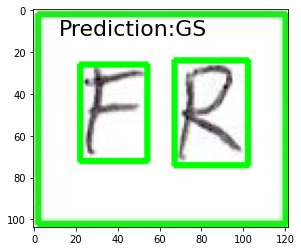

In [10]:
letter,image = get_letters("../Save_Cells_Here/box_17.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '1')

1/1 [==============================] - 0s 19ms/step
XHS


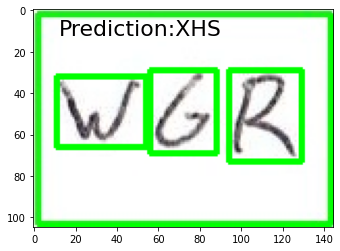

In [11]:
letter,image = get_letters("../Save_Cells_Here/box_18.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '2')

1/1 [==============================] - 0s 19ms/step
M0


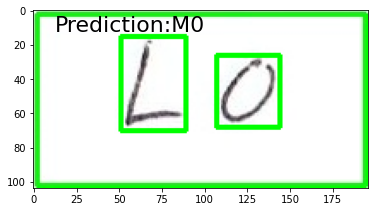

In [12]:
letter,image = get_letters("../Save_Cells_Here/box_19.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '3')

1/1 [==============================] - 0s 18ms/step
TJM


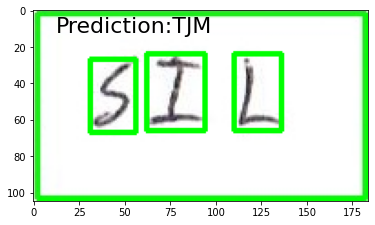

In [13]:
letter,image = get_letters("../Save_Cells_Here/box_20.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '4')

1/1 [==============================] - 0s 19ms/step
10YS3Y2


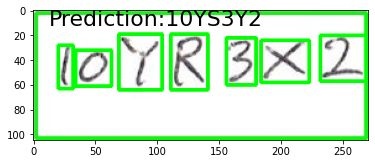

In [14]:
letter,image = get_letters("../Save_Cells_Here/box_23.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '5')

1/1 [==============================] - 0s 19ms/step
0Y10


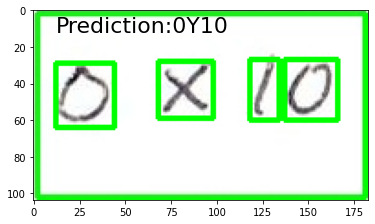

In [15]:
letter,image = get_letters("../Save_Cells_Here/box_24.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '6')

1/1 [==============================] - 0s 19ms/step
325


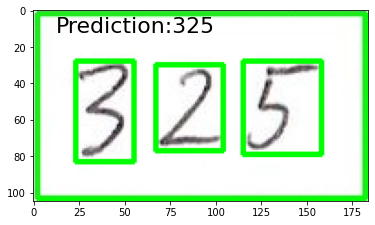

In [16]:
letter,image = get_letters("../Save_Cells_Here/box_26.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '7')

1/1 [==============================] - 0s 18ms/step
5B


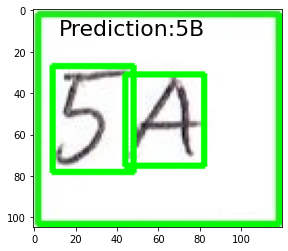

In [17]:
letter,image = get_letters("../Save_Cells_Here/box_27.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '8')

1/1 [==============================] - 0s 18ms/step
XQU


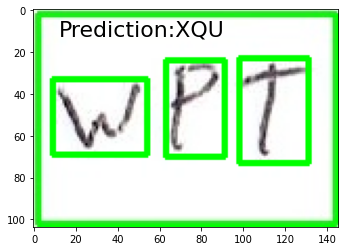

In [18]:
letter,image = get_letters("../Save_Cells_Here/box_29.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '9')

1/1 [==============================] - 0s 18ms/step
TJM


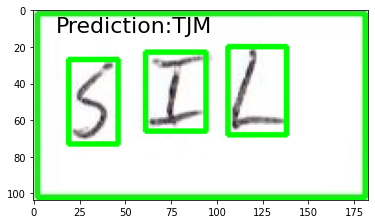

In [19]:
letter,image = get_letters("../Save_Cells_Here/box_31.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '10')

1/1 [==============================] - 0s 18ms/step
10YS5Y2


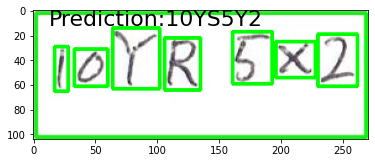

In [20]:
letter,image = get_letters("../Save_Cells_Here/box_34.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '11')

1/1 [==============================] - 0s 19ms/step
10YJ8


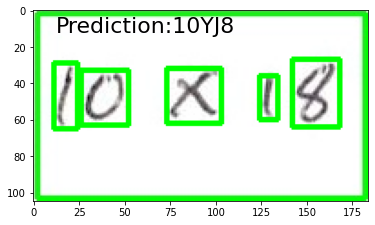

In [21]:
letter,image = get_letters("../Save_Cells_Here/box_35.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '12')

1/1 [==============================] - 0s 17ms/step
X


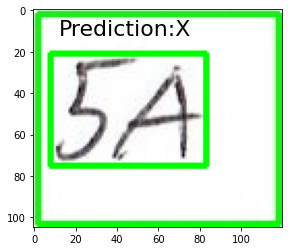

In [22]:
letter,image = get_letters("../Save_Cells_Here/box_38.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '13')

1/1 [==============================] - 0s 19ms/step
XQU


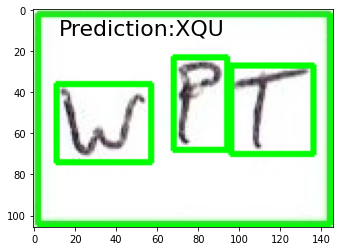

In [23]:
letter,image = get_letters("../Save_Cells_Here/box_40.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '14')

1/1 [==============================] - 0s 17ms/step
TJM


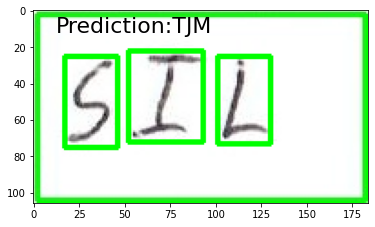

In [24]:
letter,image = get_letters("../Save_Cells_Here/box_42.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '15')

1/1 [==============================] - 0s 18ms/step
J0US5Y2


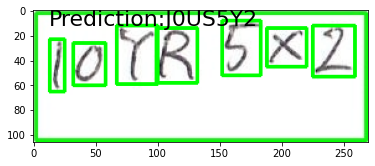

In [25]:
letter,image = get_letters("../Save_Cells_Here/box_45.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '16')

1/1 [==============================] - 0s 19ms/step
18YX


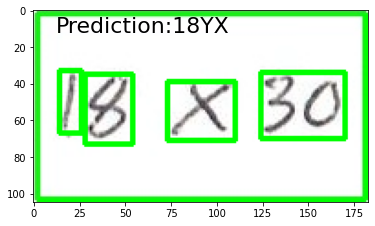

In [26]:
letter,image = get_letters("../Save_Cells_Here/box_46.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '17')

1/1 [==============================] - 0s 19ms/step
385


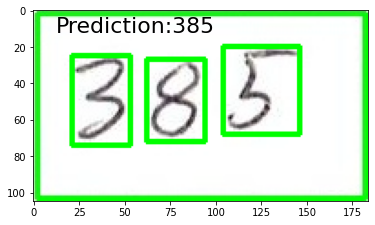

In [27]:
letter,image = get_letters("../Save_Cells_Here/box_48.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '18')

1/1 [==============================] - 0s 19ms/step
6C


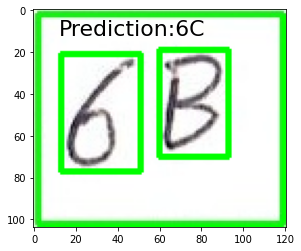

In [28]:
letter,image = get_letters("../Save_Cells_Here/box_49.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '19')

1/1 [==============================] - 0s 18ms/step
XCL


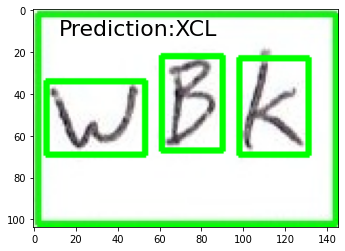

In [29]:
letter,image = get_letters("../Save_Cells_Here/box_51.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '20')

1/1 [==============================] - 0s 18ms/step
MTJM


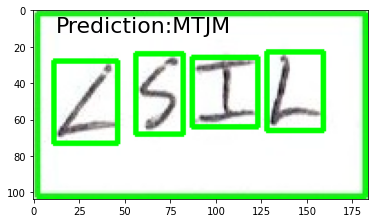

In [30]:
letter,image = get_letters("../Save_Cells_Here/box_53.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '21')

1/1 [==============================] - 0s 19ms/step
G


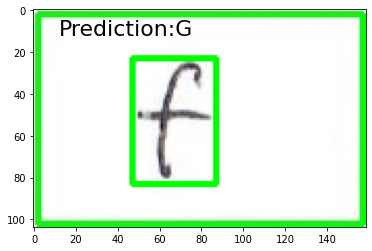

In [31]:
letter,image = get_letters("../Save_Cells_Here/box_54.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '22')

1/1 [==============================] - 0s 19ms/step
10YS3Y


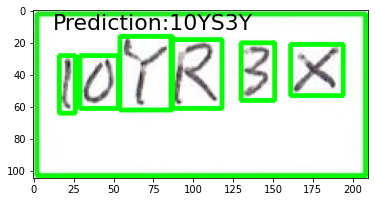

In [32]:
letter,image = get_letters("../Save_Cells_Here/box_55.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '23')

1/1 [==============================] - 0s 18ms/step
10US5Y2


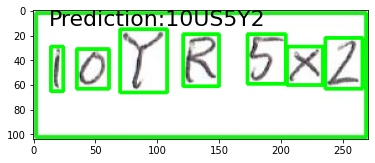

In [33]:
letter,image = get_letters("../Save_Cells_Here/box_56.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '24')

1/1 [==============================] - 0s 18ms/step
30Y43


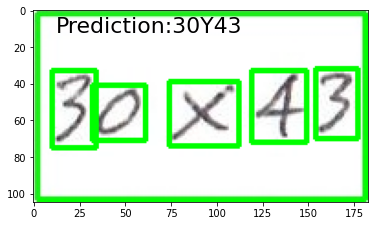

In [34]:
letter,image = get_letters("../Save_Cells_Here/box_57.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '25')

1/1 [==============================] - 0s 18ms/step
385


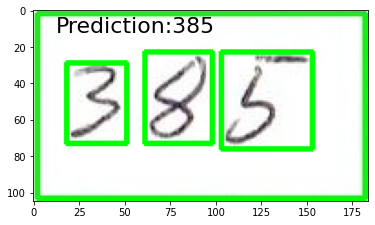

In [35]:
letter,image = get_letters("../Save_Cells_Here/box_59.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '26')

1/1 [==============================] - 0s 19ms/step
6C


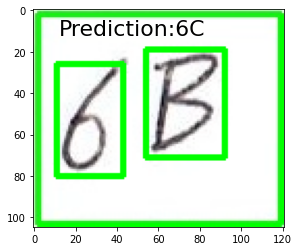

In [36]:
letter,image = get_letters("../Save_Cells_Here/box_60.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '27')

1/1 [==============================] - 0s 18ms/step
XQS


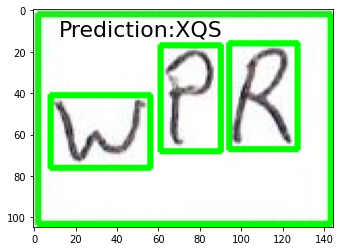

In [37]:
letter,image = get_letters("../Save_Cells_Here/box_62.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '28')

1/1 [==============================] - 0s 19ms/step
M4DM


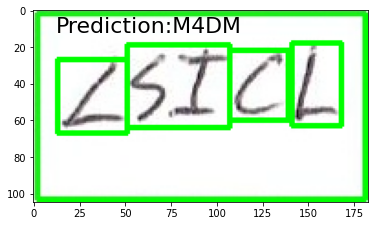

In [38]:
letter,image = get_letters("../Save_Cells_Here/box_64.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '29')

1/1 [==============================] - 0s 17ms/step
G


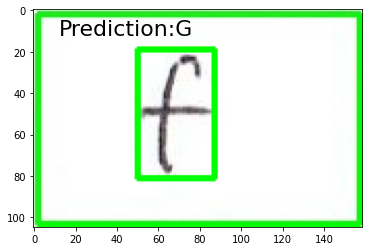

In [39]:
letter,image = get_letters("../Save_Cells_Here/box_65.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '30')

1/1 [==============================] - 0s 19ms/step
10YS5Y


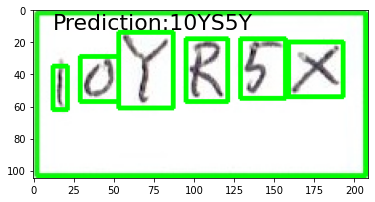

In [40]:
letter,image = get_letters("../Save_Cells_Here/box_66.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '31')

1/1 [==============================] - 0s 19ms/step
F0WJS5Y3


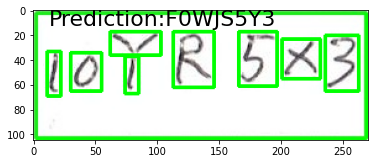

In [41]:
letter,image = get_letters("../Save_Cells_Here/box_67.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '32')

1/1 [==============================] - 0s 21ms/step
43Y60


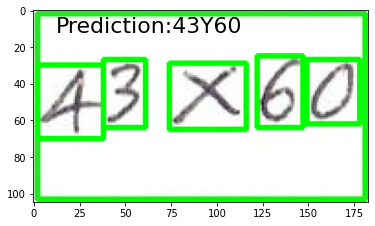

In [42]:
letter,image = get_letters("../Save_Cells_Here/box_68.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)
plt.text(12, 12, 'Prediction:' + word, fontsize = 22)
plt.savefig(path_base + '33')